In [3]:
reduction_methods = [' point', ' mean', ' median']
models = ['Dummy', 'KNN', 'Linear', 'SGD', 'XG']
models_without_dummy = ['KNN', 'Linear', 'SGD', 'XG'] #Only using dummy as baseline so disregard when discussing other stuff

In [5]:
import pickle
with open('models_KNN_and_SGD_verbose.pickle', 'rb') as handle:
    dataset_1 = pickle.load(handle)

C:\Users\Saltp\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DummyRegressor from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Saltp\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Saltp\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RBFSampler from version 1.4.2 when using version 1.5.1. This might lead to breaking cod

In [8]:
with open('models_XG_and_Linear.pickle', 'rb') as handle:
    dataset_2 = pickle.load(handle)

In [42]:
import sklearn
import numpy as np
import math
np.concatenate((dataset_2[' point']['train'][30]['X_test'],np.transpose([dataset_2[' point']['train'][30]['y_test']])), axis = 1)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 6927 and the array at index 1 has size 1

In [3]:
dataset_2[' point']['train'][30]['XG_boost']['model'

NameError: name 'dataset_2' is not defined

In [48]:
np.concatenate((dataset_2[' point']['train'][30]['X_test'],np.transpose([dataset_2[' point']['train'][30]['y_test']])), axis = 1)[:,:-1]

array([[45.356512, -93.335752, 5.614951260949585, ...,
        0.004737500000000006, 0.003857499999999986, 0.003637499999999988],
       [45.990273, -89.656676, 6.212806488703574, ...,
        0.009220000000000006, 0.0053425, 0.0039949999999999986],
       [27.964611111, -82.267416667, 2.6246686059819995, ...,
        0.11470999999999998, 0.0629825, 0.0412025],
       ...,
       [44.263, -73.287, 3.3978584676374433, ..., 0.02244750000000001,
        0.025774999999999992, 0.023767499999999997],
       [46.361942, -95.769376, 5.999928610391207, ...,
        0.016369999999999996, 0.014252500000000001, 0.012410000000000004],
       [47.949554, -91.908866, 6.037870919922137, ...,
        0.0070199999999999985, 0.003170000000000006, 0.00190499999999999]],
      dtype=object)

In [22]:

def calc_stability(model, dataset_x, dataset_y, resamples):
    resampled_performance = []
    full_dataset = np.concatenate((dataset_2[' point']['train'][30]['X_test'],np.transpose([dataset_2[' point']['train'][30]['y_test']])), axis = 1)
    samples = dataset_x.shape[0]
    for i in range(resamples):
        resampled = sklearn.utils.resample(full_dataset, replace=True, math.floor(n_samples=samples/5))
        features = resampled[:,:-2]
        targets = resampled[:,-1]

        
        
    

SyntaxError: positional argument follows keyword argument (1607897411.py, line 9)

In [ ]:
#Calc performance without extrema

In [31]:
import pandas as pd
import pickle
results = {}
for reduction_method in reduction_methods:
    results[reduction_method]={}
    for model in models:
        results[reduction_method][model] = pd.read_csv(model+reduction_method+".csv")

In [64]:
results

{}

In [3]:
results[' point']['Dummy'].iloc[0,0]

'secchi_m'

In [4]:
#Best aggregation method
adv = {' point':0,' median':0, ' mean':0}

for model in models_without_dummy:
    for i in range(0,8):
        min_agg = results[' point'][model].iloc[i]['norm']
        min_red = ' point'
        if(results[' mean'][model].iloc[i]['norm']<min_agg):
            min_agg = results[' mean'][model].iloc[i]['norm']
            min_red = ' mean'
        if(results[' median'][model].iloc[i]['norm']<min_agg):
            min_agg = results[' median'][model].iloc[i]['norm']
            min_red = ' median' 
        adv[min_red] = adv[min_red]+1
    
        
        

In [5]:
adv

{' point': 8, ' median': 14, ' mean': 10}

In [6]:
#Average difference in normalized RMSE between results
adv = {' point':0,' median':0, ' mean':0}

import numpy as np
sum = 0
for model in models_without_dummy:
    for i in range(0,8):
        
        sum += (max(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']) - min(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']))

sum = sum/(len(models_without_dummy)*8)
        

In [ ]:
sum

In [37]:
#Average difference in normalized RMSE between results
adv = {' point':0,' median':0, ' mean':0}

import numpy as np
sum = 0
for model in models_without_dummy:
    for i in [3,7]:
        sum += (max(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']) - min(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']))

sum = sum/(len(models_without_dummy)*2)

In [39]:
sum

0.0012290150892448875

In [ ]:
#Ph and tn
adv = {' point':0,' median':0, ' mean':0}

import numpy as np
sum = 0
for model in models_without_dummy:
    for i in range(0,8):
        if(i==):
            sum += (max(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']) - min(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']))

sum = sum/(len(models_without_dummy)*8-1)

In [15]:
import numpy as np
diff = []
for model in models:
    for i in range(0,8):
        diff.append(max(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']) - min(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']))
        
        if(max(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']) - min(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm'])>0.1):
            print(model)
            print(i)
            
print(max(diff))

XG
5
0.11072258546049296


In [41]:
import numpy as np
diff = []
for model in models:
    for i in [3,7]:
        diff.append(max(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']) - min(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']))
        
        if(max(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']) - min(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm'])>0.1):
            print(model)
            print(i)
            
print(max(diff))

0.00489836555656889


In [33]:
import numpy as np
diff = []
for model in models:
    for i in range(0,8):
        if( i!=5 and model!='XG'):
            diff.append(max(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']) - min(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']))
            
            if(max(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']) - min(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm'])>0.1):
                print(model)
                print(i)
                
print(max(diff))

0.02500425059387934


In [25]:
#Best agg method by model and independent var

import numpy as np
dict = {0: 'point', 1:'mean', 2:'median'}
for model in models:
    for i in range(0,8):
        arr = [results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']]
        ind = arr.index(min(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']))
        
        print(model + " " + results[' point']['Dummy'].iloc[i,0] + " " + dict[ind])
print(max(diff))

Dummy secchi_m point
Dummy chla_ugl point
Dummy do_mgl point
Dummy ph point
Dummy tp_ugl point
Dummy salinity_ppm point
Dummy sio2_mgl point
Dummy tn_ugl point
KNN secchi_m mean
KNN chla_ugl median
KNN do_mgl point
KNN ph point
KNN tp_ugl mean
KNN salinity_ppm point
KNN sio2_mgl point
KNN tn_ugl point
Linear secchi_m mean
Linear chla_ugl mean
Linear do_mgl median
Linear ph median
Linear tp_ugl mean
Linear salinity_ppm median
Linear sio2_mgl median
Linear tn_ugl mean
SVR secchi_m mean
SVR chla_ugl mean
SVR do_mgl median
SVR ph median
SVR tp_ugl mean
SVR salinity_ppm mean
SVR sio2_mgl point
SVR tn_ugl mean
XG secchi_m mean
XG chla_ugl point
XG do_mgl point
XG ph mean
XG tp_ugl mean
XG salinity_ppm median
XG sio2_mgl median
XG tn_ugl median
0.11072258546049296


In [27]:
#Best agg method by model and independent var

import numpy as np
dict = {0: 'point', 1:'mean', 2:'median'}

for i in range(0,8):
    for model in models:
        arr = [results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']]
        ind = arr.index(min(results[' point'][model].iloc[i]['norm'],results[' median'][model].iloc[i]['norm'],results[' mean'][model].iloc[i]['norm']))
        
        print(model + " " + results[' point']['Dummy'].iloc[i,0] + " " + dict[ind])
print(max(diff))

Dummy secchi_m point
KNN secchi_m mean
Linear secchi_m mean
SVR secchi_m mean
XG secchi_m mean
Dummy chla_ugl point
KNN chla_ugl median
Linear chla_ugl mean
SVR chla_ugl mean
XG chla_ugl point
Dummy do_mgl point
KNN do_mgl point
Linear do_mgl median
SVR do_mgl median
XG do_mgl point
Dummy ph point
KNN ph point
Linear ph median
SVR ph median
XG ph mean
Dummy tp_ugl point
KNN tp_ugl mean
Linear tp_ugl mean
SVR tp_ugl mean
XG tp_ugl mean
Dummy salinity_ppm point
KNN salinity_ppm point
Linear salinity_ppm median
SVR salinity_ppm mean
XG salinity_ppm median
Dummy sio2_mgl point
KNN sio2_mgl point
Linear sio2_mgl median
SVR sio2_mgl point
XG sio2_mgl median
Dummy tn_ugl point
KNN tn_ugl point
Linear tn_ugl mean
SVR tn_ugl mean
XG tn_ugl median
0.11072258546049296


Text(0, 0.5, 'Number of models')

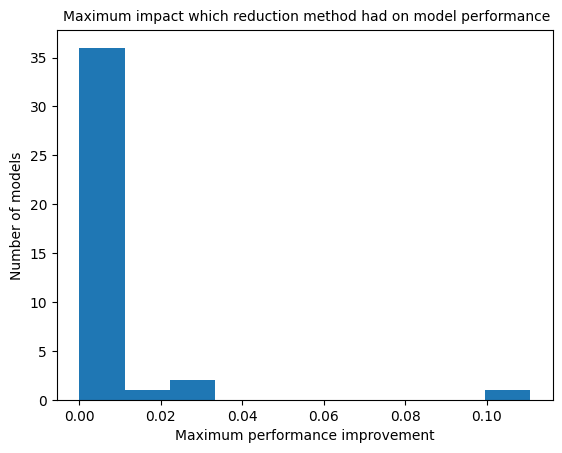

In [57]:
import matplotlib.pyplot as plt

plt.hist(diff)
plt.figtext(0.135, 0.9,"Maximum impact which aggregation method had on model performance")
plt.xlabel("Maximum performance improvement")
plt.ylabel("Number of models")

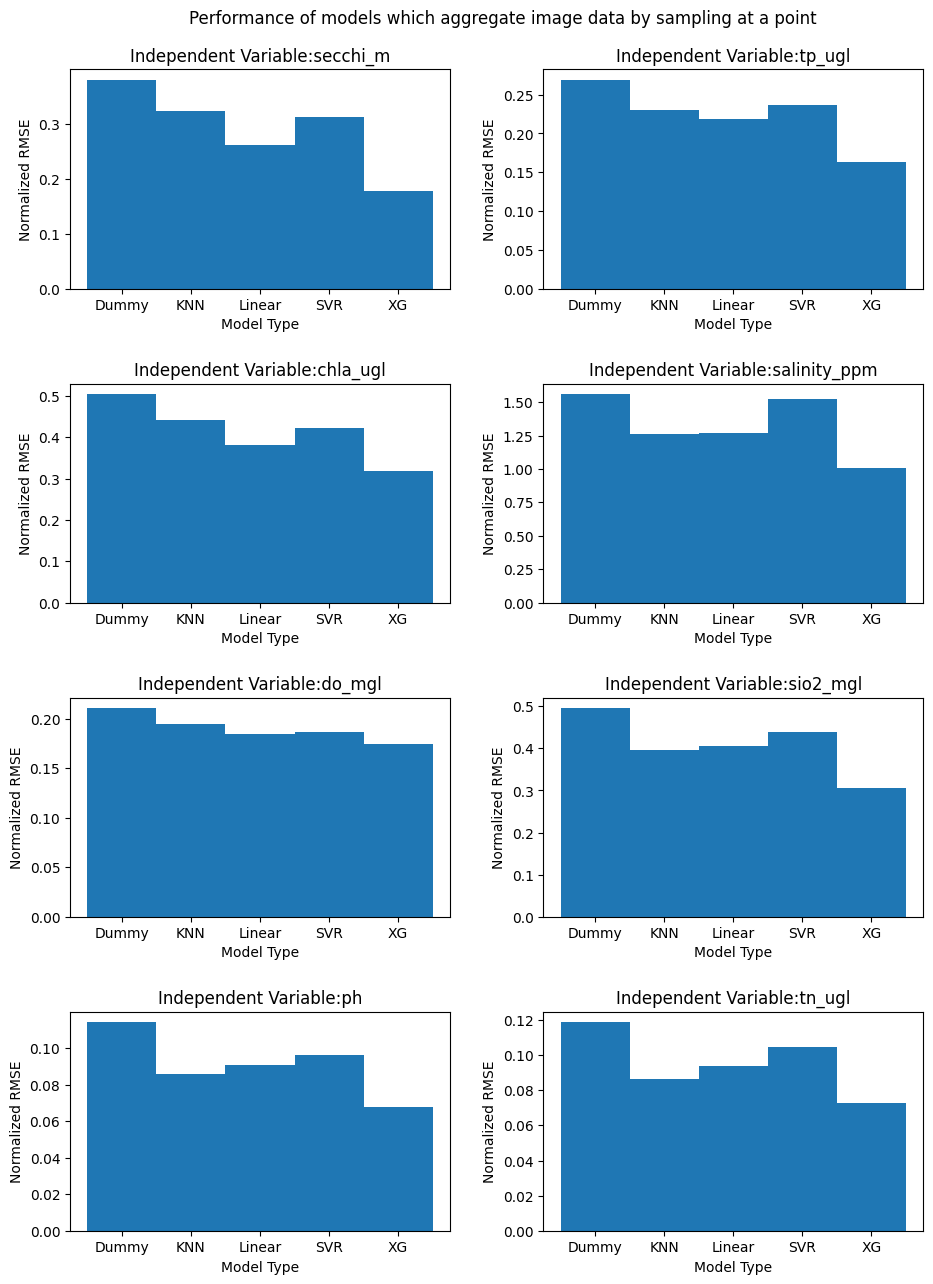

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

fig, axs = plt.subplots(4, 2,figsize=(6, 6))
fig.tight_layout()
fig.subplots_adjust(top = 2)
fig.subplots_adjust(right = 1.5)
for i in range(0,8):
    model_names = []
    perf = []
    for model in models:
        perf.append(results[' point'][model].iloc[i]['norm'])
        model_names.append(model)
        
    ax = axs[(i%4), (math.floor(i/4) % 2)]
    ax.bar(model_names,perf,1)
    ax.set_title("Independent Variable:"+results[' point']['Dummy'].iloc[i,0])
    ax.set_xlabel("Model Type")
    ax.set_ylabel("Normalized RMSE")
plt.suptitle("Performance of models which aggregate image data by sampling at a point", y = 2.1, x=0.8)
plt.savefig("point_performance.png", bbox_inches='tight')
plt.show()
        


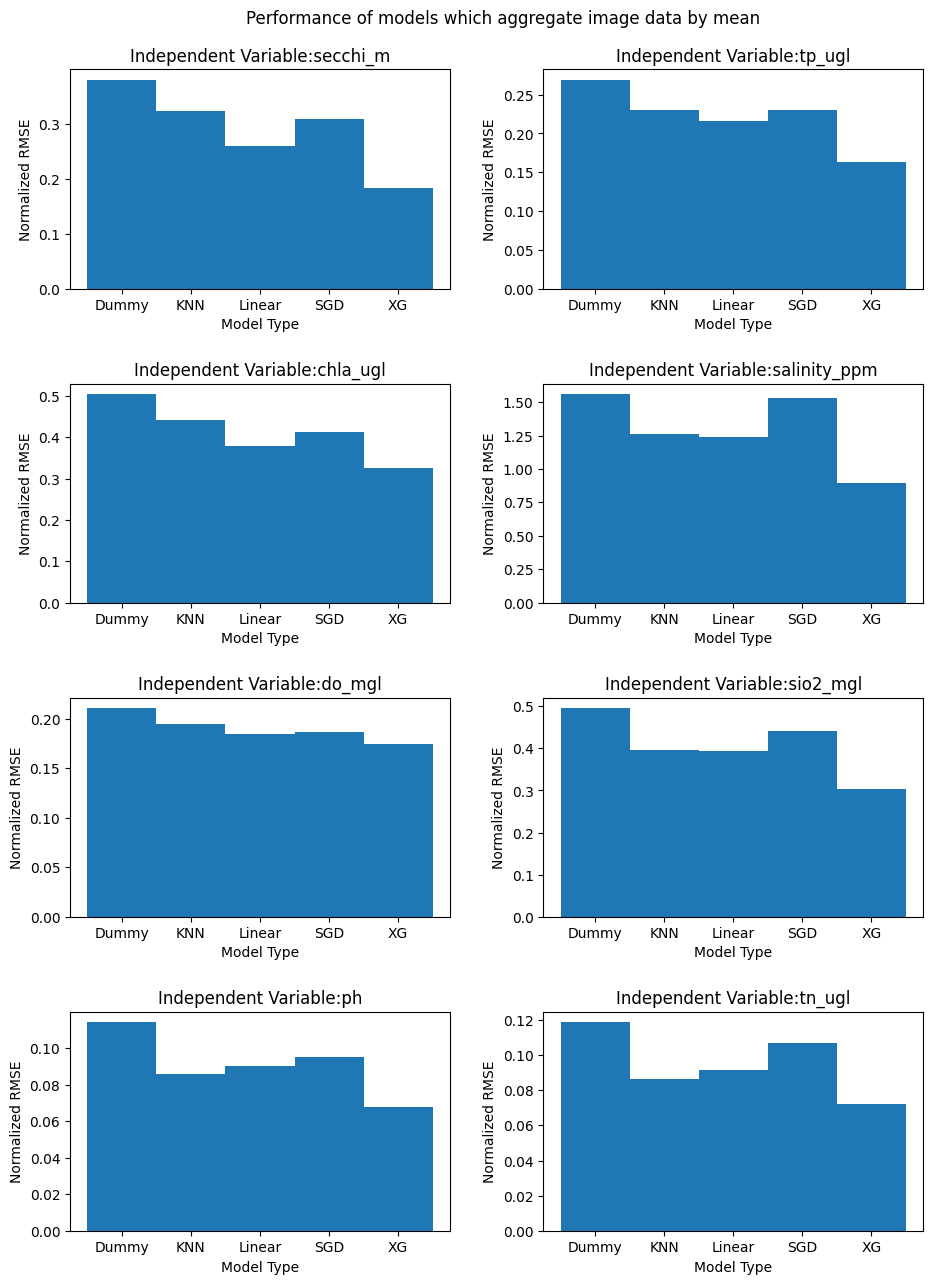

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

fig, axs = plt.subplots(4, 2,figsize=(6, 6))
fig.tight_layout()
fig.subplots_adjust(top = 2)
fig.subplots_adjust(right = 1.5)
for i in range(0,8):
    model_names = []
    perf = []
    for model in models:
        perf.append(results[' mean'][model].iloc[i]['norm'])
        model_names.append(model)
        
    ax = axs[(i%4), (math.floor(i/4) % 2)]
    ax.bar(model_names,perf,1)
    ax.set_title("Independent Variable:"+results[' mean']['Dummy'].iloc[i,0])
    ax.set_xlabel("Model Type")
    ax.set_ylabel("Normalized RMSE")
plt.suptitle("Performance of models which aggregate image data by mean", y = 2.1, x=0.8)
plt.savefig("mean_performance.png", bbox_inches='tight')
plt.show()

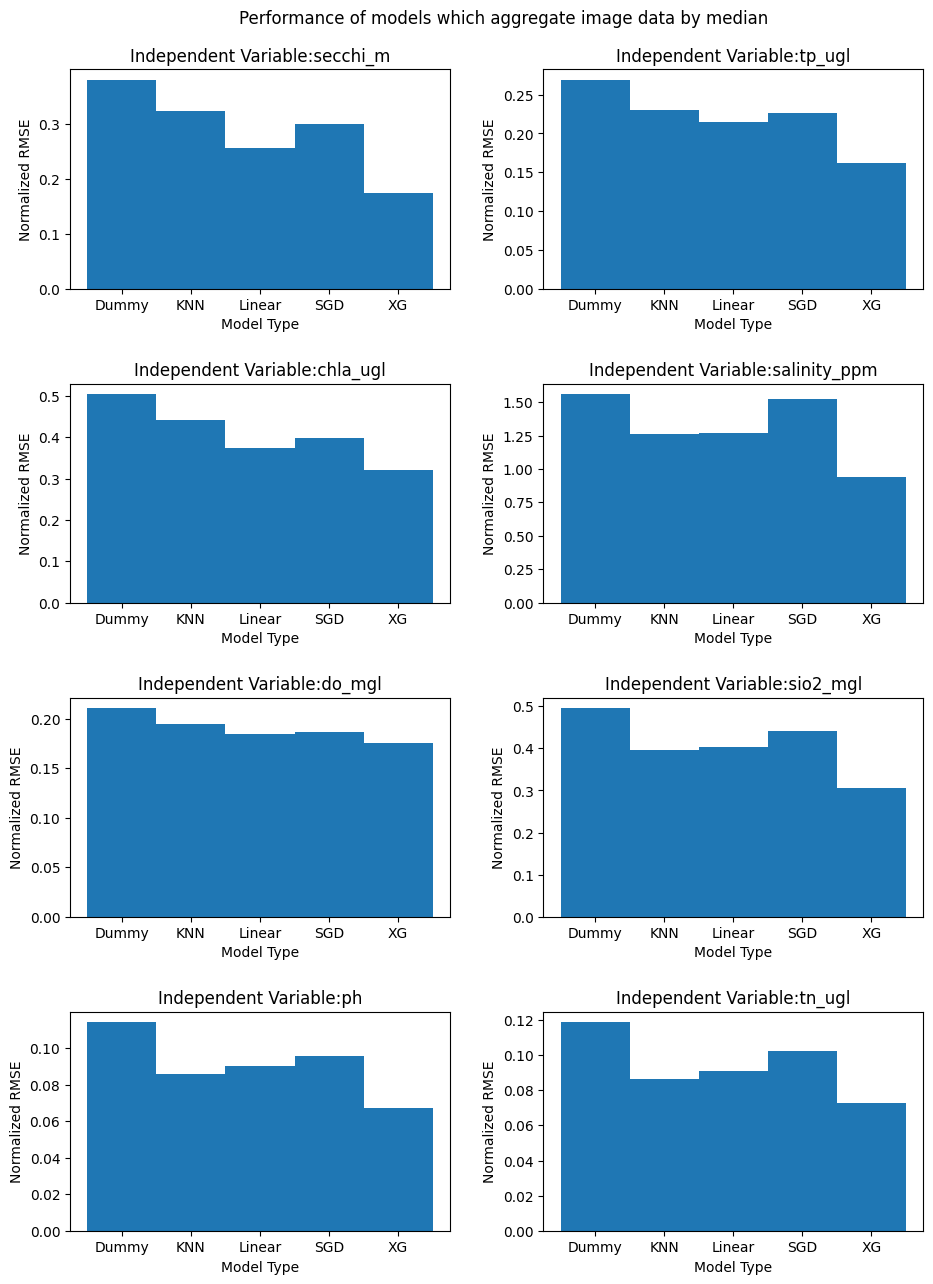

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

fig, axs = plt.subplots(4, 2,figsize=(6, 6))
fig.tight_layout()
fig.subplots_adjust(top = 2)
fig.subplots_adjust(right = 1.5)
for i in range(0,8):
    model_names = []
    perf = []
    for model in models:
        perf.append(results[' median'][model].iloc[i]['norm'])
        model_names.append(model)
        
    ax = axs[(i%4), (math.floor(i/4) % 2)]
    ax.bar(model_names,perf,1)
    ax.set_title("Independent Variable:"+results[' median']['Dummy'].iloc[i,0])
    ax.set_xlabel("Model Type")
    ax.set_ylabel("Normalized RMSE")
plt.suptitle("Performance of models which aggregate image data by median", y = 2.1, x=0.8)
plt.savefig("median_performance.png", bbox_inches='tight')
plt.show()

In [23]:
#Average model performance on each var
for i in range(0,8):
    sum = 0
    for model in models_without_dummy:
        sum+=results[' point'][model].iloc[i]['norm']
        sum+=results[' mean'][model].iloc[i]['norm']
        sum+=results[' median'][model].iloc[i]['norm']
    print(results[' point']['Dummy'].iloc[i,0]+":"+str(sum/12))


secchi_m:0.2667663163566912
chla_ugl:0.3876282844987638
do_mgl:0.1849051017789393
ph:0.08480771646344594
tp_ugl:0.21006965356914176
salinity_ppm:1.2484603769034248
sio2_mgl:0.3859304955195577
tn_ugl:0.08884838458001226


In [13]:
#Independent var
import numpy as np
import pandas as pd
perfdict = {}
for i in range(0,8):
    sum = 0
    for model in models_without_dummy:
        sum+=results[' point'][model].iloc[i]['norm']
        sum+=results[' mean'][model].iloc[i]['norm']
        sum+=results[' median'][model].iloc[i]['norm']
    perfdict[results[' point']['Dummy'].iloc[i,0]] = [sum/(3*len(models_without_dummy))]
        
pd.DataFrame(perfdict)

,secchi_m,chla_ugl,do_mgl,ph,tp_ugl,salinity_ppm,sio2_mgl,tn_ugl
0,0.266766,0.387628,0.184905,0.084808,0.21007,1.24846,0.38593,0.088848


In [74]:
#Feature importance
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
independent_vars = ['source_samplesite_lat_dd','source_samplesite_lon_dd','lake_elevation_m','lake_totalarea_ha','lake_elevation_m','lake_totalarea_ha','lake_perimeter_m','lake_shorelinedevfactor','month','year','lake_mix_layer_temperature',
       'lake_mix_layer_temperature_min', 'lake_mix_layer_temperature_max',
       'lake_mix_layer_depth', 'lake_mix_layer_depth_min',
       'lake_mix_layer_depth_max', 'u_component_of_wind_10m',
       'u_component_of_wind_10m_min', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m', 'v_component_of_wind_10m_min',
       'v_component_of_wind_10m_max', 'total_precipitation_sum',
       'total_precipitation_min', 'total_precipitation_max',
       'surface_net_solar_radiation_sum', 'surface_net_solar_radiation_min',
       'surface_net_solar_radiation_max','SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','SR_B6','SR_B7']
dependent_var = 'parameter_value'
num_to_param = {30:'secchi_m',9:'chla_ugl',21:'tn_ugl',23:'do_mgl',25:'ph',27:'tp_ugl',31:'sio2_mgl',48:'salinity_ppm'}

def permute_importance(dataset, reduction_method, key, model):
    dataset_split = dataset[reduction_method]['train'][key]
    
    feature_importance = permutation_importance(model,dataset_split['X_test'], dataset_split['y_test'],n_repeats=50,random_state=42)
    print(feature_importance.importances_mean)
    fig, ax = plt.subplots()
    ax.barh(independent_vars,feature_importance.importances_mean)
    ax.invert_yaxis()
    ax.set_title("XG_boost"+" "+num_to_param[key]+" feature importance")
    plt.show()

In [76]:
from pathlib import Path
import pickle
root = Path(r'Result_visualization.ipnyb').absolute().parent.parent.parent
with open(str(root)+r"\data\processed_data\0.4_dataset_preprocessing.pickle",'rb') as handle:
    dataset = pickle.load(handle) 

In [77]:
import pickle
with open(str(Path(r'Result_visualization.ipnyb').absolute().parent.parent)+r'\2_model_training\models_XG_and_Linear.pickle', 'rb') as handle:
    data= pickle.load(handle)

In [78]:
data[' point']

{'train': {30: {'X_train': array([[44.3451, -68.2389, 4.618086441382969, ..., 0.006497499999999989,
           0.0046549999999999925, 0.002454999999999985],
          [44.076389, -88.500003, 5.422744944923089, ...,
           0.0002274999999999916, 0.001354999999999995,
           0.002124999999999988],
          [44.21124, -96.063859, 6.250168226698564, ...,
           0.007212499999999983, 0.010237499999999983, 0.008669999999999983],
          ...,
          [46.987964, -94.932215, 6.078559239974039, ..., 0.027865,
           0.031494999999999995, 0.028799999999999992],
          [46.352393, -95.647923, 6.0063531596017325, ...,
           0.008119999999999988, 0.007982500000000003, 0.007047499999999984],
          [46.9675, -94.8622, 6.077642243349034, ..., 0.002014999999999989,
           0.0013825000000000087, 0.0016025000000000067]], dtype=object),
   'X_test': array([[45.356512, -93.335752, 5.614951260949585, ...,
           0.004737500000000006, 0.003857499999999986, 0.003637499

[0.17385518 0.34992607 0.12197878 0.03704717 0.         0.
 0.04328671 0.02705589 0.0052066  0.00212068 0.00089587 0.01033952
 0.00623151 0.00516918 0.00543089 0.00278006 0.00144359 0.00355937
 0.00434177 0.00121897 0.00186496 0.00228432 0.00652172 0.00072454
 0.00494323 0.00491709 0.         0.00464193 0.0100252  0.00628396
 0.24216346 0.01083837 0.01496541 0.0055936  0.00690167]


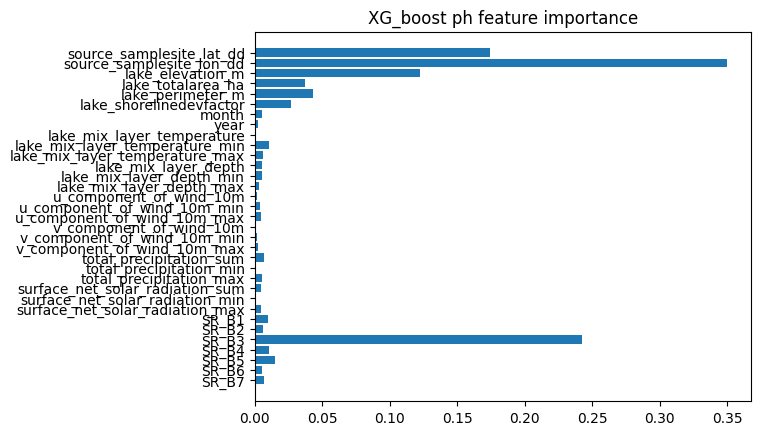

[0.13388036 0.45883673 0.13963951 0.02471856 0.         0.
 0.07418757 0.04681708 0.00573183 0.00262736 0.00374865 0.00938125
 0.00663199 0.00330776 0.00904893 0.00332575 0.00092557 0.00462743
 0.00161561 0.00176555 0.00420698 0.00354918 0.00078304 0.00090521
 0.00109119 0.00764993 0.         0.00710676 0.00298737 0.01165798
 0.20949524 0.0219858  0.04159734 0.02336688 0.00812346]


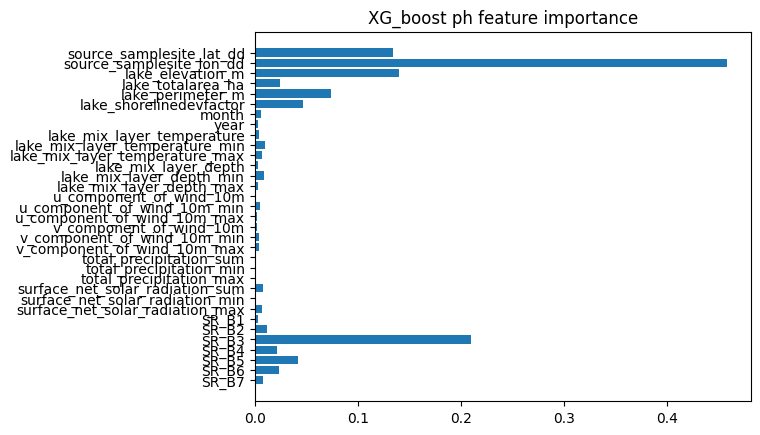

[ 1.39731045e-01  3.56692435e-01  1.00366368e-01  2.66577210e-02
  0.00000000e+00  0.00000000e+00  4.19719115e-02  3.04899454e-02
  2.33401423e-03  2.17109795e-03  4.94569457e-03  1.12229533e-02
  6.99916667e-03  1.55441517e-03  3.06604532e-03  2.40779505e-03
  2.85342740e-03  6.45220367e-03 -2.06139468e-04  2.16477298e-05
  1.69333104e-03  1.56315066e-03  1.25587069e-03  4.52204570e-05
  1.34448203e-03  8.38169522e-03  0.00000000e+00  5.45937248e-03
  5.23923563e-03  2.60350862e-03  3.29397012e-01  8.70380907e-03
  1.84682298e-02  8.03595174e-03  1.77834008e-03]


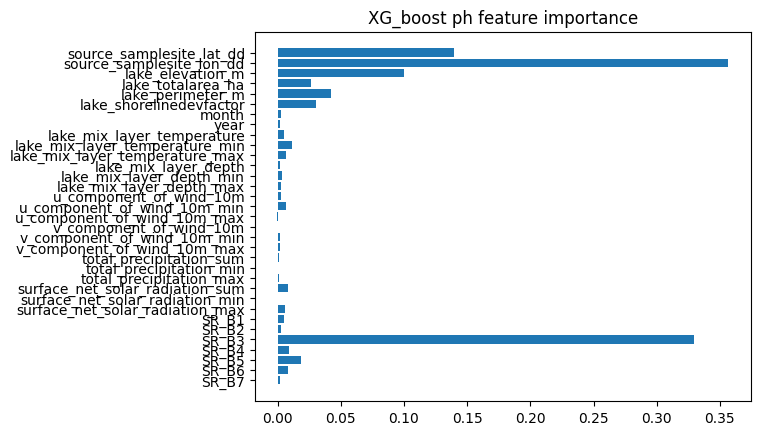

In [79]:

for reduction_method in reduction_methods:
    permute_importance(dataset,reduction_method,25, data[reduction_method]['train'][25]['XG_block']['model'])

In [29]:
dataset

{' point': {'train': {30: {'X_train': array([[44.3451, -68.2389, 4.618086441382969, ..., 0.006497499999999989,
            0.0046549999999999925, 0.002454999999999985],
           [44.076389, -88.500003, 5.422744944923089, ...,
            0.0002274999999999916, 0.001354999999999995,
            0.002124999999999988],
           [44.21124, -96.063859, 6.250168226698564, ...,
            0.007212499999999983, 0.010237499999999983, 0.008669999999999983],
           ...,
           [46.987964, -94.932215, 6.078559239974039, ..., 0.027865,
            0.031494999999999995, 0.028799999999999992],
           [46.352393, -95.647923, 6.0063531596017325, ...,
            0.008119999999999988, 0.007982500000000003, 0.007047499999999984],
           [46.9675, -94.8622, 6.077642243349034, ..., 0.002014999999999989,
            0.0013825000000000087, 0.0016025000000000067]], dtype=object),
    'X_test': array([[45.356512, -93.335752, 5.614951260949585, ...,
            0.004737500000000006, 0.00385

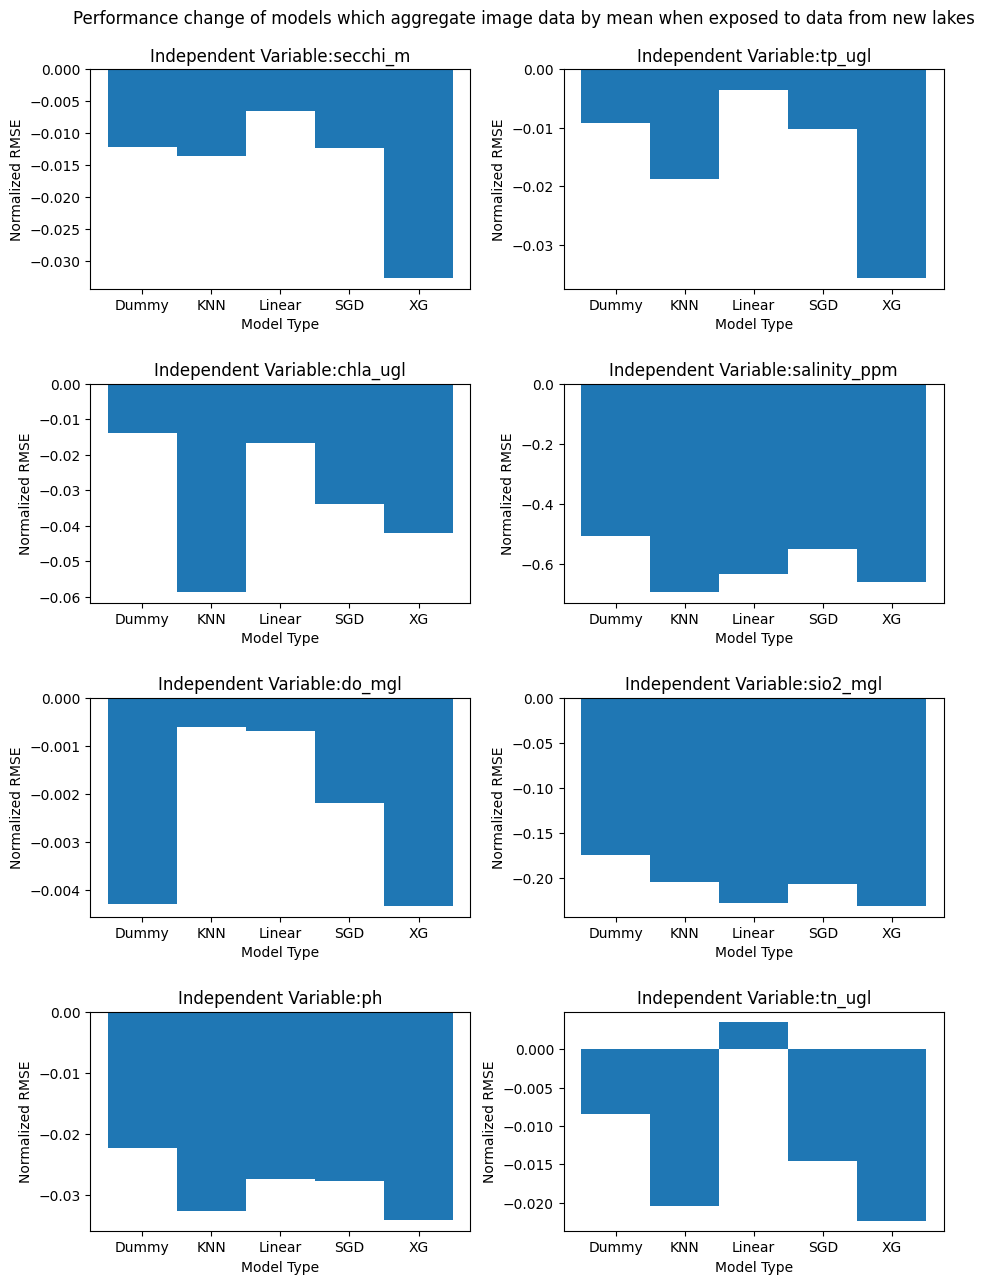

In [83]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

fig, axs = plt.subplots(4, 2,figsize=(6, 6))
fig.tight_layout()
fig.subplots_adjust(top = 2)
fig.subplots_adjust(right = 1.5)
for i in range(0,8):
    model_names = []
    perf = []
    for model in models:
        perf.append(results[' mean'][model].iloc[i]['norm']-results[' mean'][model].iloc[i]['space'])
        model_names.append(model)
        
    ax = axs[(i%4), (math.floor(i/4) % 2)]
    ax.bar(model_names,perf,1)
    ax.set_title("Independent Variable:"+results[' mean']['Dummy'].iloc[i,0])
    ax.set_xlabel("Model Type")
    ax.set_ylabel("Normalized RMSE")
plt.suptitle("Performance change of models which aggregate image data by mean when exposed to data from new lakes", y = 2.1, x=0.8)
plt.savefig("mean_spatial_drop_performance.png", bbox_inches='tight')
plt.show()

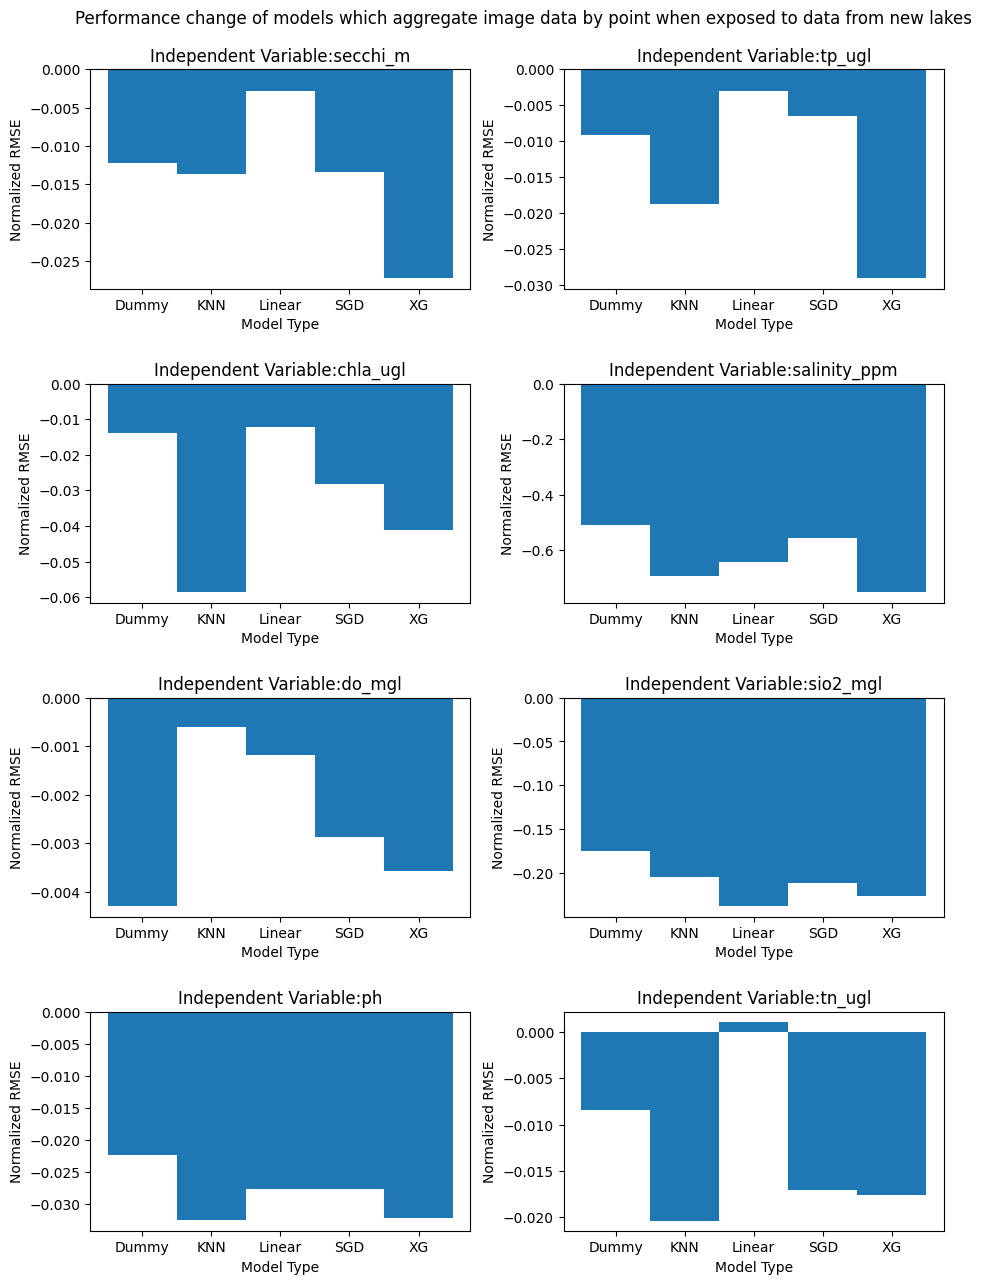

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

fig, axs = plt.subplots(4, 2,figsize=(6, 6))
fig.tight_layout()
fig.subplots_adjust(top = 2)
fig.subplots_adjust(right = 1.5)
for i in range(0,8):
    model_names = []
    perf = []
    for model in models:
        perf.append(results[' point'][model].iloc[i]['norm']-results[' point'][model].iloc[i]['space'])
        model_names.append(model)
        
    ax = axs[(i%4), (math.floor(i/4) % 2)]
    ax.bar(model_names,perf,1)
    ax.set_title("Independent Variable:"+results[' point']['Dummy'].iloc[i,0])
    ax.set_xlabel("Model Type")
    ax.set_ylabel("Normalized RMSE")
plt.suptitle("Performance change of models which aggregate image data by point when exposed to data from new lakes", y = 2.1, x=0.8)
plt.savefig("point_spatial_drop_performance.png", bbox_inches='tight')
plt.show()

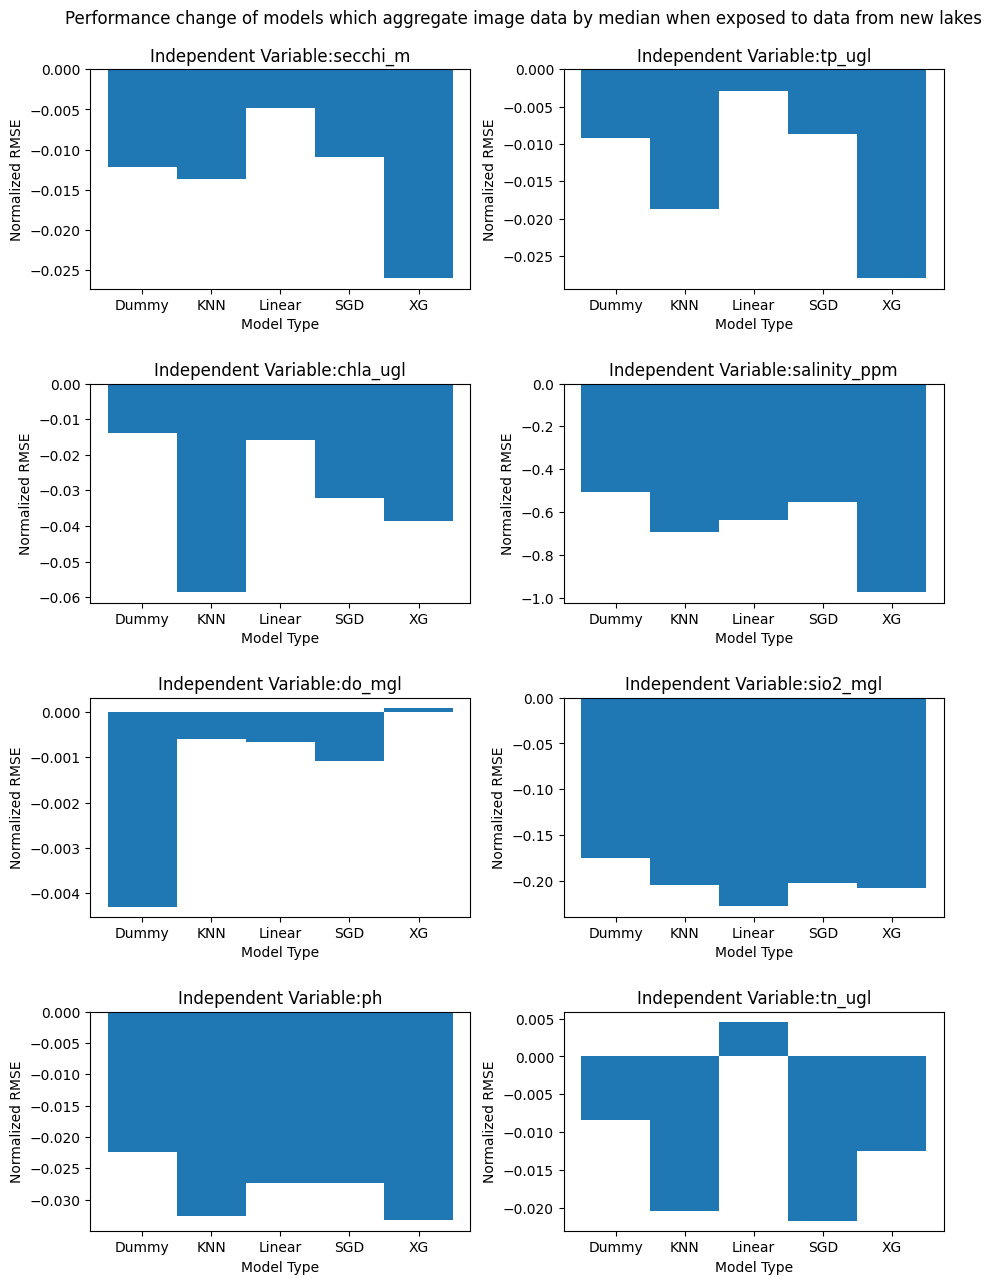

In [79]:
#Spatial vs normal

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

fig, axs = plt.subplots(4, 2,figsize=(6, 6))
fig.tight_layout()
fig.subplots_adjust(top = 2)
fig.subplots_adjust(right = 1.5)
for i in range(0,8):
    model_names = []
    perf = []
    for model in models:
        perf.append(results[' median'][model].iloc[i]['norm']-results[' median'][model].iloc[i]['space'])
        model_names.append(model)
        
    ax = axs[(i%4), (math.floor(i/4) % 2)]
    ax.bar(model_names,perf,1)
    ax.set_title("Independent Variable:"+results[' median']['Dummy'].iloc[i,0])
    ax.set_xlabel("Model Type")
    ax.set_ylabel("Normalized RMSE")
plt.suptitle("Performance change of models which aggregate image data by median when exposed to data from new lakes", y = 2.1, x=0.8)
plt.savefig("median_spatial_drop_performance.png", bbox_inches='tight')
plt.show()

In [107]:
import numpy as np
import math
def clipped_norm_RMSE(model, test_data, test_target, key,clip):
    if (key in features_to_log):
        vec1 = np.vectorize(lambda x: math.exp(x)-1)(vec1)
        vec2 = np.vectorize(lambda x: math.exp(x)-1)(vec2)
    return np.sqrt(np.mean((vec1-vec2)**2))

    resid = np.vectorize(lambda x: x*x)(model.predict(test_data)-test_target)
    #clip outliers
    sum_total = np.sum(np.sort(resid)[0:resid.size-math.floor(resid.size/clip)])
    rmse = math.sqrt(sum_total/sum_total.size)
    return rmse/(test_target.mean())


In [109]:
clipped_norm_RMSE(dataset_2[' median']['train'][30]['XG_block']['model'],dataset_2[' median']['time_test'][30]['independent'],dataset_2[' median']['time_test'][30]['dependent'], 10)

7.423234489982806

In [111]:
clipped_norm_RMSE(dataset_2[' median']['train'][30]['XG_block']['model'],dataset_2[' median']['train'][30]['X_test'],dataset_2[' median']['train'][30]['y_test'], 10)

9.770834796723722

In [105]:
sum.size

AttributeError: 'builtin_function_or_method' object has no attribute 'size'

In [39]:

num_to_param = {30:'secchi_m',9:'chla_ugl',21:'tn_ugl',23:'do_mgl',25:'ph',27:'tp_ugl',31:'sio2_mgl',48:'salinity_ppm'}

In [81]:
clip = 8

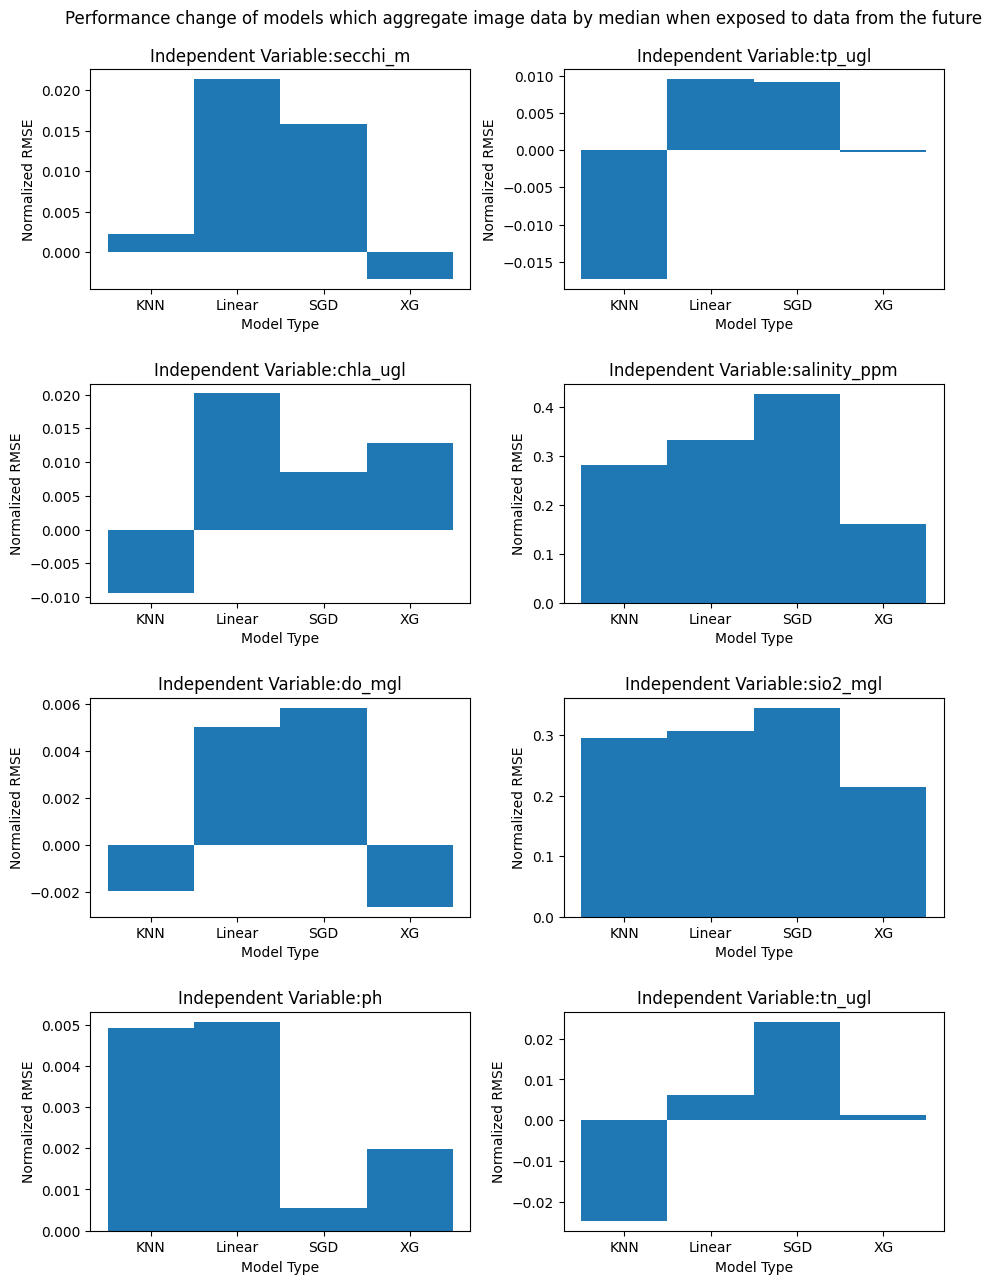

In [91]:
#Spatial vs normal

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

params = [30, 9, 23, 25, 27, 48, 31, 21]
num_to_params = ['secchi_m','chla_ugl','do_mgl','ph','tp_ugl','salinity_ppm','sio2_mgl','tn_ugl']

fig, axs = plt.subplots(4, 2,figsize=(6, 6))
fig.tight_layout()
fig.subplots_adjust(top = 2)
fig.subplots_adjust(right = 1.5)
for i in range(0,8):
    model_names = []
    perf = []

    for model in ['KNN']:
        norm_results = clipped_norm_RMSE(dataset_1[' median']['train'][params[i]][model]['model'],dataset_1[' median']['train'][params[i]]['X_test'],dataset_1[' median']['train'][params[i]]['y_test'],clip)
        time_results = clipped_norm_RMSE(dataset_1[' median']['train'][params[i]][model]['model'],dataset_1[' median']['time_test'][params[i]]['independent'],dataset_1[' median']['time_test'][params[i]]['dependent'],clip)
        perf.append(norm_results-time_results)
        model_names.append('KNN')
    for model in ['Linear_model_block']:
        norm_results = clipped_norm_RMSE(dataset_2[' median']['train'][params[i]][model]['model'],dataset_2[' median']['train'][params[i]]['X_test'],dataset_2[' median']['train'][params[i]]['y_test'],clip)
        time_results = clipped_norm_RMSE(dataset_2[' median']['train'][params[i]][model]['model'],dataset_2[' median']['time_test'][params[i]]['independent'],dataset_2[' median']['time_test'][params[i]]['dependent'],clip)
        perf.append(norm_results-time_results)
        model_names.append('Linear')
    for model in ['SVR']:
        norm_results = clipped_norm_RMSE(dataset_1[' median']['train'][params[i]][model]['model'],dataset_1[' median']['train'][params[i]]['X_test'],dataset_1[' median']['train'][params[i]]['y_test'],clip)
        time_results = clipped_norm_RMSE(dataset_1[' median']['train'][params[i]][model]['model'],dataset_1[' median']['time_test'][params[i]]['independent'],dataset_1[' median']['time_test'][params[i]]['dependent'],clip)
        perf.append(norm_results-time_results)
        model_names.append('SGD')
    for model in ['XG_block']:
        norm_results = clipped_norm_RMSE(dataset_2[' median']['train'][params[i]][model]['model'],dataset_2[' median']['train'][params[i]]['X_test'],dataset_2[' median']['train'][params[i]]['y_test'],clip)
        time_results = clipped_norm_RMSE(dataset_2[' median']['train'][params[i]][model]['model'],dataset_2[' median']['time_test'][params[i]]['independent'],dataset_2[' median']['time_test'][params[i]]['dependent'],clip)
        perf.append(norm_results-time_results)
        model_names.append('XG')
        
    ax = axs[(i%4), (math.floor(i/4) % 2)]
    ax.bar(model_names,perf,1)
    ax.set_title("Independent Variable:"+num_to_params[i])
    ax.set_xlabel("Model Type")
    ax.set_ylabel("Normalized RMSE")
plt.suptitle("Performance change of models which aggregate image data by median when exposed to data from the future", y = 2.1, x=0.8)
plt.savefig("median_temporal_drop_performance_clipped.png", bbox_inches='tight')
plt.show()

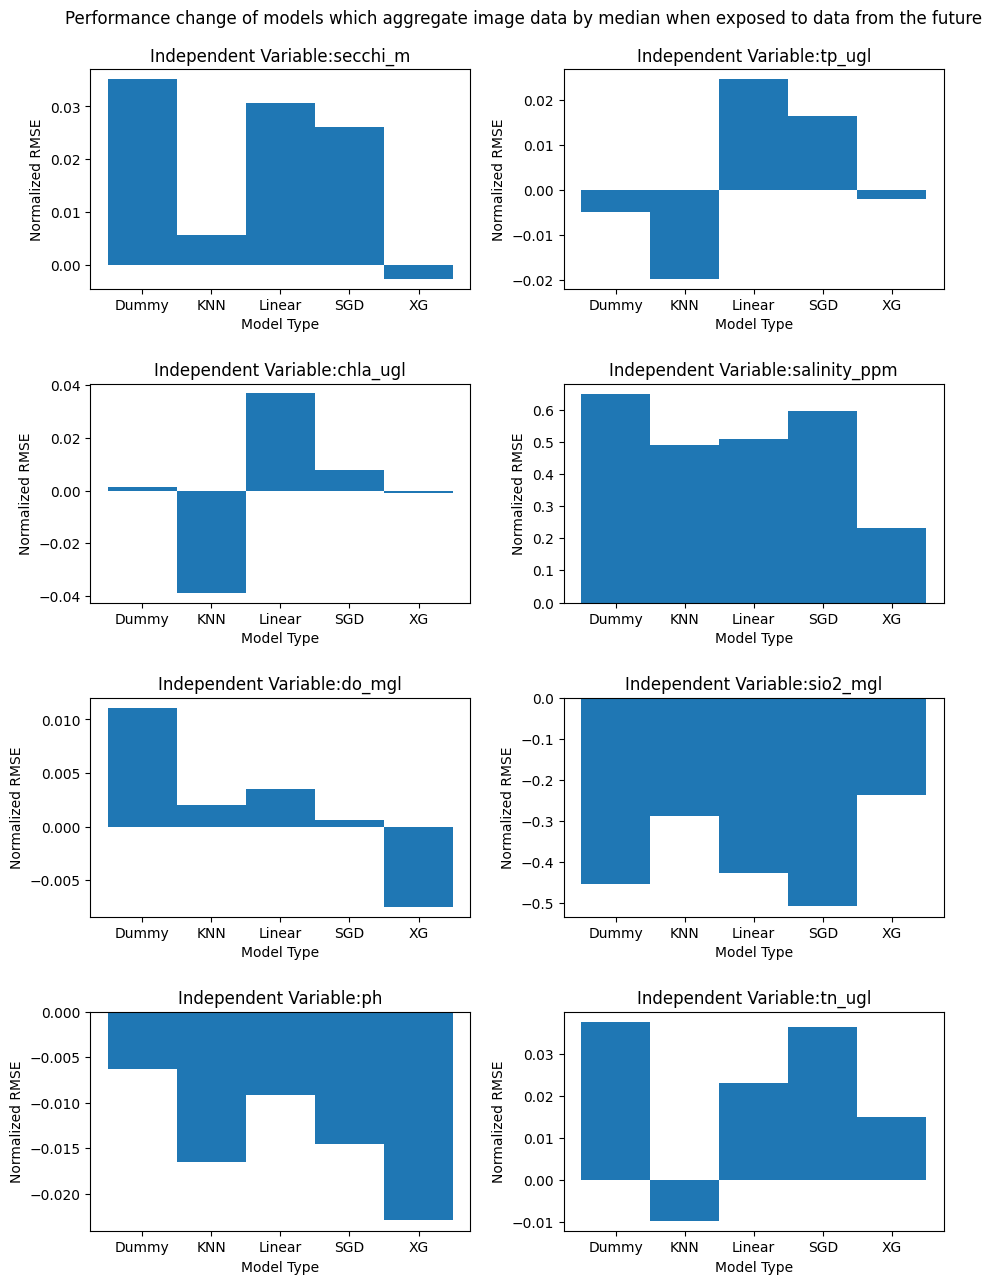

In [85]:
#Spatial vs normal

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

fig, axs = plt.subplots(4, 2,figsize=(6, 6))
fig.tight_layout()
fig.subplots_adjust(top = 2)
fig.subplots_adjust(right = 1.5)
for i in range(0,8):
    model_names = []
    perf = []
    for model in models:
        perf.append(results[' median'][model].iloc[i]['norm']-results[' median'][model].iloc[i]['time'])
        model_names.append(model)
        
    ax = axs[(i%4), (math.floor(i/4) % 2)]
    ax.bar(model_names,perf,1)
    ax.set_title("Independent Variable:"+results[' median']['Dummy'].iloc[i,0])
    ax.set_xlabel("Model Type")
    ax.set_ylabel("Normalized RMSE")
plt.suptitle("Performance change of models which aggregate image data by median when exposed to data from the future", y = 2.1, x=0.8)
plt.savefig("median_temporal_drop_performance.png", bbox_inches='tight')
plt.show()